In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [ ]:
#df_class=pd.read_csv("/content/survey_data.csv")
df_class=pd.read_csv("https://raw.githubusercontent.com/sijuswamy/PyWorks/main/survey_data.csv")

In [ ]:
df_class.sample(5).style.set_properties(**{'background-color': 'darkgreen',
                           'color': 'white',
                           'border-color': 'darkblack'})

,Timestamp,Your Gender,Your age (completed in years),Your weight (in Kg),I like orange,I like grapes,I like banana,I like apple,I like mango,I like cherry,Your Height (in cm)
51,11/25/2022 10:52:38,Female,21,60,seasonally,seasonally,seasonally,seasonally,my favorite,not at all,163.000000
53,11/25/2022 10:52:39,Female,22,55,seasonally,my favorite,not at all,my favorite,my favorite,my favorite,175.000000
102,11/29/2022 10:04:24,Female,19,50,some what,some what,if no other fruits available,seasonally,some what,some what,153.000000
98,11/29/2022 10:04:20,Female,21,42,some what,my favorite,not at all,some what,my favorite,some what,152.000000
83,11/29/2022 10:04:05,Female,20,48,seasonally,seasonally,some what,my favorite,my favorite,seasonally,162.000000


## Data wrangling

In [ ]:

df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      138 non-null    object 
 1   Your Gender                    138 non-null    object 
 2   Your age (completed in years)  138 non-null    int64  
 3   Your weight (in Kg)            138 non-null    int64  
 4   I like orange                  138 non-null    object 
 5   I like grapes                  138 non-null    object 
 6   I like banana                  138 non-null    object 
 7   I like apple                   138 non-null    object 
 8   I like mango                   138 non-null    object 
 9   I like cherry                  138 non-null    object 
 10  Your Height (in cm)            138 non-null    float64
dtypes: float64(1), int64(2), object(8)
memory usage: 12.0+ KB


In [ ]:
df_class = df_class.drop(['Timestamp'],axis=1)

In [ ]:
df_class.columns = ["Gender","Age","Weight","Orange","Grapes","Banana","Apple","Mango","Cherry","Height"]

In [ ]:
# creating a new categorical variable 'Age group`
df_class['Age_group'] = pd.cut(x=df_class['Age'], bins=[-np.Inf, 20, 30, np.Inf],
                    labels=["adolescent","youth","elder"])

In [ ]:
df_class.sample(5)

,Gender,Age,Weight,Orange,Grapes,Banana,Apple,Mango,Cherry,Height,Age_group
84,Female,20,44,seasonally,my favorite,not at all,some what,seasonally,seasonally,155.0,adolescent
65,Male,21,90,seasonally,seasonally,seasonally,seasonally,my favorite,seasonally,190.0,youth
88,Female,21,46,seasonally,some what,not at all,my favorite,my favorite,seasonally,155.0,youth
103,Male,21,50,seasonally,my favorite,my favorite,seasonally,seasonally,some what,150.0,youth
134,Male,20,50,not at all,not at all,my favorite,not at all,not at all,not at all,180.0,adolescent


In [ ]:
# checking for null
df_class.isnull().sum().sum()

0

In [ ]:
# dimension

df_class.shape

(138, 11)

## Exploratory Data Analysis

In [ ]:
## creating a percentage analysis of gender-wise distribution of data
round(df_class["Gender"].value_counts(normalize=True)*100,2)

Female    59.42
Male      40.58
Name: Gender, dtype: float64

## Visualization

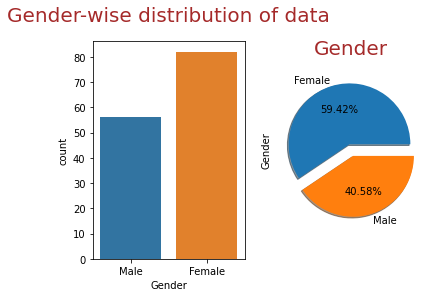

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Gender', data=df_class)
#ax.bar_label(ax.containers[0])
plt.title("Gender-wise distribution of data", fontsize=20,color = 'Brown',pad=20)
ax =plt.subplot(1,2,2)
ax=df_class['Gender'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Gender", fontsize = 20,color='Brown',pad=20);

## Weight


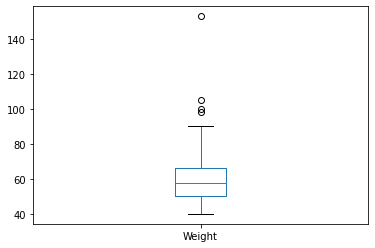

In [ ]:
df_class.boxplot(column =['Weight'], grid = False)
plt.show()

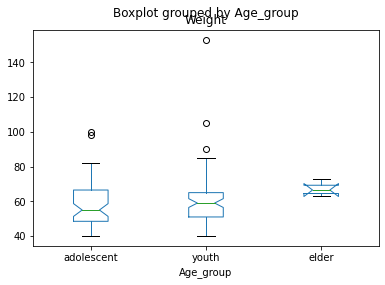

In [ ]:
df_class.boxplot(by ='Age_group', column =['Weight'], grid = False,notch=True)
plt.show()

## Age group

In [ ]:
## creating a percentage analysis of gender-wise distribution of data
round(df_class["Age_group"].value_counts(normalize=True)*100,2)

youth         54.35
adolescent    42.75
elder          2.90
Name: Age_group, dtype: float64

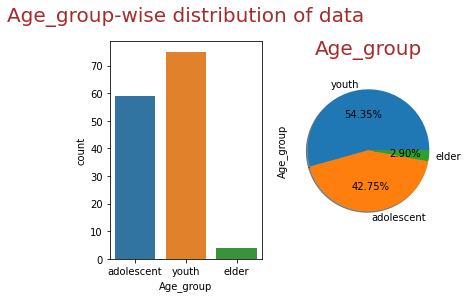

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Age_group', data=df_class)
#ax.bar_label(ax.containers[0])
plt.title("Age_group-wise distribution of data", fontsize=20,color = 'Brown',pad=20)
ax =plt.subplot(1,2,2)
ax=df_class['Age_group'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Age_group", fontsize = 20,color='Brown',pad=20);

## Fruit type -Orange

In [ ]:
## creating a percentage analysis of gender-wise distribution of data
round(df_class["Orange"].value_counts(normalize=True)*100,2)

seasonally                      45.65
my favorite                     28.99
some what                       19.57
if no other fruits available     2.90
not at all                       2.90
Name: Orange, dtype: float64

## Likeness of orange over age group

A percentage analysis of likeness of orange over age category is shown below.

In [ ]:
round(pd.crosstab(columns = df_class['Age_group'], index = df_class['Orange'],normalize=True)*100,2)

Age_group,adolescent,youth,elder
Orange,,,
if no other fruits available,1.45,1.45,0.00
my favorite,12.32,15.94,0.72
not at all,2.90,0.00,0.00
seasonally,17.39,26.09,2.17
some what,8.70,10.87,0.00


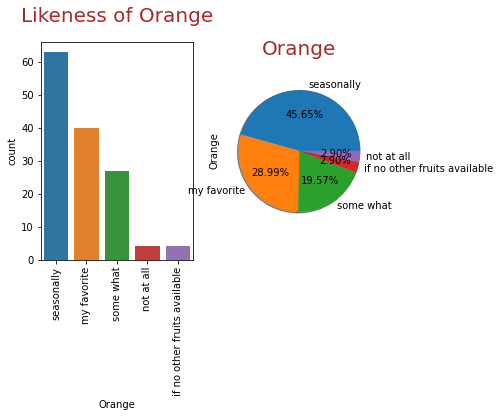

In [ ]:
large_to_small = df_class.groupby('Orange').size().sort_values().index[::-1]
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Orange', data=df_class, order=large_to_small)
plt.xticks(rotation=90)
#ax.bar_label(ax.containers[0])
plt.title("Likeness of Orange", fontsize=20,color = 'Brown',pad=20)
ax =plt.subplot(1,2,2)
ax=df_class['Orange'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Orange", fontsize = 20,color='Brown',pad=20);

## Grapes



In [ ]:
## creating a percentage analysis of gender-wise distribution of data
round(df_class["Grapes"].value_counts(normalize=True)*100,2)

seasonally                      39.13
my favorite                     33.33
some what                       15.94
if no other fruits available     7.25
not at all                       4.35
Name: Grapes, dtype: float64

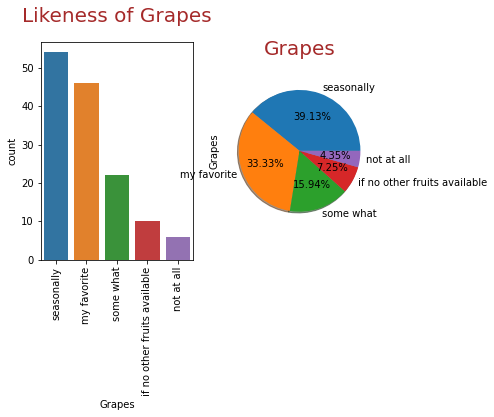

In [ ]:
large_to_small = df_class.groupby('Grapes').size().sort_values().index[::-1]
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Grapes', data=df_class, order=large_to_small)
plt.xticks(rotation=90)
#ax.bar_label(ax.containers[0])
plt.title("Likeness of Grapes", fontsize=20,color = 'Brown',pad=20)
ax =plt.subplot(1,2,2)
ax=df_class['Grapes'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Grapes", fontsize = 20,color='Brown',pad=20);

In [ ]:
round(pd.crosstab(columns = df_class['Age_group'], index = df_class['Grapes'],normalize=True)*100,2)

Age_group,adolescent,youth,elder
Grapes,,,
if no other fruits available,2.90,4.35,0.00
my favorite,10.14,22.46,0.72
not at all,4.35,0.00,0.00
seasonally,18.12,20.29,0.72
some what,7.25,7.25,1.45


## Fruit type -Banana

In [ ]:
## creating a percentage analysis of gender-wise distribution of data
round(df_class["Banana"].value_counts(normalize=True)*100,2)

seasonally                      26.81
some what                       23.19
my favorite                     22.46
if no other fruits available    15.94
not at all                      11.59
Name: Banana, dtype: float64

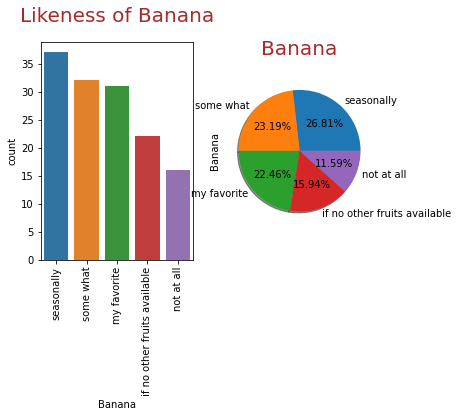

In [ ]:
large_to_small = df_class.groupby('Banana').size().sort_values().index[::-1]
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Banana', data=df_class, order=large_to_small)
plt.xticks(rotation=90)
#ax.bar_label(ax.containers[0])
plt.title("Likeness of Banana", fontsize=20,color = 'Brown',pad=20)
ax =plt.subplot(1,2,2)
ax=df_class['Banana'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Banana", fontsize = 20,color='Brown',pad=20);

In [ ]:
round(pd.crosstab(columns = df_class['Age_group'], index = df_class['Banana'],normalize=True)*100,2)

Age_group,adolescent,youth,elder
Banana,,,
if no other fruits available,8.70,7.25,0.00
my favorite,6.52,15.22,0.72
not at all,7.25,4.35,0.00
seasonally,10.14,14.49,2.17
some what,10.14,13.04,0.00


In [ ]:
round(pd.crosstab(columns = df_class['Gender'], index = df_class['Banana'],normalize=True)*100,2)

Gender,Female,Male
Banana,,
if no other fruits available,9.42,6.52
my favorite,13.77,8.70
not at all,7.25,4.35
seasonally,14.49,12.32
some what,14.49,8.70


## Bring all the analysis into one figure

In [ ]:
df_long=pd.melt(df_class, id_vars=["Gender","Age","Weight","Height","Age_group"], value_vars=["Orange", "Grapes", "Banana","Apple","Mango","Cherry"], var_name="Fruit", value_name="Rating", ignore_index=False)

## Comparison of Fruit preference

In [ ]:
df_long['Rating'].value_counts(ascending=False)

seasonally                      284
my favorite                     274
some what                       158
if no other fruits available     58
not at all                       54
Name: Rating, dtype: int64

In [ ]:
round(pd.crosstab(columns = df_long['Fruit'], index = df_long['Rating'],normalize=True)*100,2)

Fruit,Apple,Banana,Cherry,Grapes,Mango,Orange
Rating,,,,,,
if no other fruits available,0.60,2.66,2.05,1.21,0.00,0.48
my favorite,5.80,3.74,2.66,5.56,10.51,4.83
not at all,0.60,1.93,2.05,0.72,0.72,0.48
seasonally,6.04,4.47,5.19,6.52,4.47,7.61
some what,3.62,3.86,4.71,2.66,0.97,3.26


In [ ]:
df_long.describe().style.background_gradient(cmap='rainbow').set_precision(3)

,Age,Weight,Height
count,828.000,828.000,828.000
mean,21.297,59.848,161.049
std,3.197,14.924,21.113
min,19.000,40.000,5.700
25%,20.000,50.000,155.000
50%,21.000,57.500,163.000
75%,21.000,66.000,171.000
max,42.000,153.000,190.000


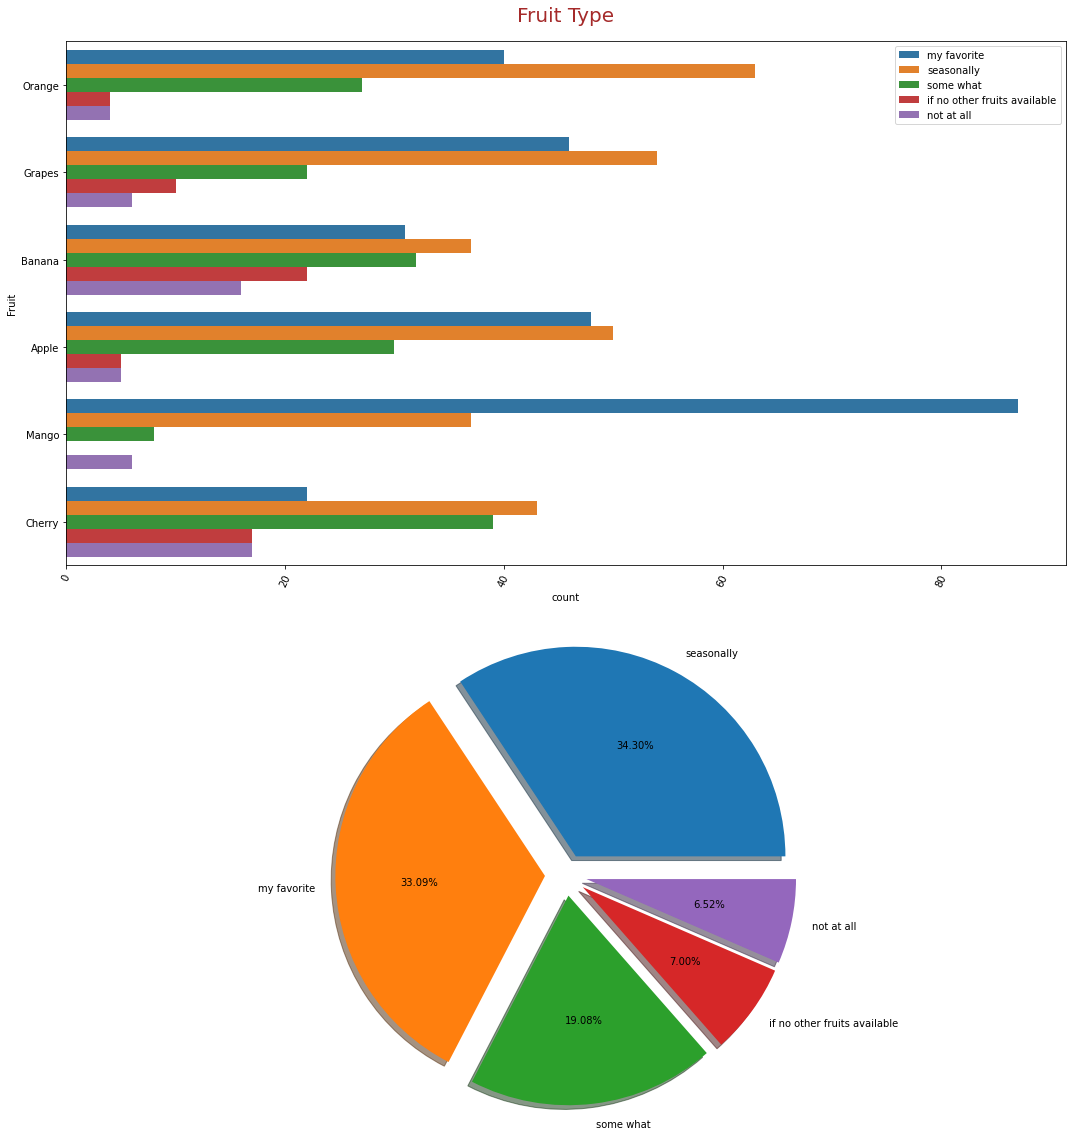

In [ ]:
ax = plt.figure(figsize = (15,16))
ax = plt.subplot(2,1,1)
ax = sns.countplot(data=df_long, y='Fruit', hue='Rating',dodge=True)
#ax.bar_label(ax.containers[0])
plt.title("Fruit Type", fontsize=20,color = 'Brown',pad=20)
plt.legend(loc='upper right')
plt.xticks(rotation=65)
plt.tight_layout()

ax =plt.subplot(2,1,2)
ax=df_long['Rating'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1],autopct='%1.2f%%',shadow=True);
plt.tight_layout()
plt.axis('off');

## Generalisation of findings using inferential statistics

In [ ]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# libraries for inferential analysis
import researchpy as rp
import scipy.stats as stats
import statsmodels.api as sm

1. **Significance of gender over the fruit rating categories**

Here we starts with the assumtion that;

$H_0$: Gender has no significance impact on the fruit rating level

$H_1$: Gender has a significant impact on the fruit rating level

Note that here both gender and fruit rating are categorical variable. So a possibility for cross tabulation is here. Hence we can check the homogenity of distribution using a $\chi^2$ test.

In [ ]:
# showing a summary of category wise distribution
rp.summary_cat(df_long[["Gender", "Rating"]])

,Variable,Outcome,Count,Percent
0,Gender,Female,492,59.42
1,,Male,336,40.58
2,Rating,seasonally,284,34.30
3,,my favorite,274,33.09
4,,some what,158,19.08
5,,if no other fruits available,58,7.00
6,,not at all,54,6.52


In [ ]:
# creating a contigency table
ct1=pd.crosstab(index = df_long['Gender'], columns = df_long['Rating'])

In [ ]:
ct1

Rating,if no other fruits available,my favorite,not at all,seasonally,some what
Gender,,,,,
Female,0.042271,0.214976,0.035024,0.207729,0.094203
Male,0.027778,0.115942,0.030193,0.135266,0.096618


Now to pass this contingency table to the `scipy.stats` method. The output isn't the best formatted, but all the information is there. The information is returned within a tuple where the first value is the $\chi^2$  test static, the second value is the p-value, and the third number is the degrees of freedom. An array is also returned which contains the expected cell counts.

In [ ]:
stats.chi2_contingency(ct1)


(11.020459792506145,
 0.026335034228023153,
 4,
 array([[ 34.46376812, 162.8115942 ,  32.08695652, 168.75362319,
          93.88405797],
        [ 23.53623188, 111.1884058 ,  21.91304348, 115.24637681,
          64.11594203]]))

>**Interpretation:** There is a relationship between gender and the fruit rating level, $\chi^2(4) = 11.02, p< 0.05$.

### Using `Researchpy` library

Now to conduct the $\chi^2$ test of independence using `Researchpy`. The method that needs to be used is `researchpy.crosstab`.

By default, the method returns the requested objects in a tuple that is just as ugly as `scipy.stats`. For cleaner output, one can assign each requested object from the tuple to another object and then those separately. The expected cell counts will be requested and used later while checking the assumptions for this statistical test. Additionally, will request the crosstabulation be returned with the cell percentage instead of the cell count.

In [ ]:
crosstab, test_results, expected = rp.crosstab(df_long["Gender"], df_long["Rating"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

Rating                                    \
Rating if no other fruits available my favorite not at all seasonally   
Gender                                                                  
Female                         4.23       21.50       3.50      20.77   
Male                           2.78       11.59       3.02      13.53   
All                            7.00       33.09       6.52      34.30   

                          
Rating some what     All  
Gender                    
Female      9.42   59.42  
Male        9.66   40.58  
All        19.08  100.00

In [ ]:
test_results


,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,11.0205
1,p-value =,0.0263
2,Cramer's V =,0.1154


Since the Cramers' V is jist greater that 0.10, the test result is acceptable is just moderate. If it is greater than 0.25, then it is a strong result.

## ASSUMPTION CHECK
Checking the assumptions for the $\chi^2$ test of independence is easy. Let's recall what they are:

- The two samples are independent

- The variables were collected independently of each other, i.e. the answer from one variable was not dependent on the answer of the other

- No expected cell count is = 0
- No more than 20% of the cells have and expected cell count < 5

The last two assumptions can be checked by looking at the expected frequency table.

In [ ]:
expected


Rating                                     \
Rating if no other fruits available my favorite not at all  seasonally   
Gender                                                                   
Female                    34.463768  162.811594  32.086957  168.753623   
Male                      23.536232  111.188406  21.913043  115.246377   

                   
Rating  some what  
Gender             
Female  93.884058  
Male    64.115942

It can be seen that all the assumptions are met which indicates the statistical test results are reliable.



## To assess the difference in the rating score over Gender

In [ ]:
# transform rating vel to scores
df_score=df_class
# converting categorical rating to integers
df_score["Orange"]=df_score["Orange"].map({'not at all': 1, 'if no other fruits available': 2,'some what':3,'seasonally':4,'my favorite':5 })
df_score["Apple"]=df_score["Apple"].map({'not at all': 1, 'if no other fruits available': 2,'some what':3,'seasonally':4,'my favorite':5 })
df_score["Banana"]=df_score["Banana"].map({'not at all': 1, 'if no other fruits available': 2,'some what':3,'seasonally':4,'my favorite':5 })
df_score["Cherry"]=df_score["Cherry"].map({'not at all': 1, 'if no other fruits available': 2,'some what':3,'seasonally':4,'my favorite':5 })
df_score["Grapes"]=df_score["Grapes"].map({'not at all': 1, 'if no other fruits available': 2,'some what':3,'seasonally':4,'my favorite':5 })
df_score["Mango"]=df_score["Mango"].map({'not at all': 1, 'if no other fruits available': 2,'some what':3,'seasonally':4,'my favorite':5 })

In [ ]:
#calculating total score per respondent
df_score["Score"]=df_score["Orange"]+df_score["Apple"]+df_score["Banana"]+df_score["Cherry"]+df_score["Grapes"]+df_score["Mango"]

In [ ]:
df_score.head()

,Gender,Age,Weight,Orange,Grapes,Banana,Apple,Mango,Cherry,Height,Age_group,Score
0,Male,42,68,5,3,4,3,4,1,162.0,elder,20
1,Female,39,63,4,4,4,4,5,4,145.0,elder,25
2,Male,36,65,4,3,5,4,5,2,150.0,elder,23
3,Male,21,60,4,4,4,4,4,4,174.0,youth,24
4,Male,21,105,4,4,1,4,5,4,172.0,youth,22


In [ ]:
## melting dataframe
df_long1=pd.melt(df_class, id_vars=["Gender","Age","Weight","Height","Age_group","Score"], value_vars=["Orange", "Grapes", "Banana","Apple","Mango","Cherry"], var_name="Fruit", value_name="Rating", ignore_index=False)

In [ ]:
df_long1.head()

,Gender,Age,Weight,Height,Age_group,Score,Fruit,Rating
0,Male,42,68,162.0,elder,20,Orange,5
1,Female,39,63,145.0,elder,25,Orange,4
2,Male,36,65,150.0,elder,23,Orange,4
3,Male,21,60,174.0,youth,24,Orange,4
4,Male,21,105,172.0,youth,22,Orange,4


In [ ]:
df_long1.describe()

,Age,Weight,Height,Score,Rating
count,828.000000,828.000000,828.000000,828.000000,828.000000
mean,21.297101,59.847826,161.049275,22.826087,3.804348
std,3.197057,14.924187,21.112544,3.627611,1.162860
min,19.000000,40.000000,5.700000,10.000000,1.000000
25%,20.000000,50.000000,155.000000,21.000000,3.000000
50%,21.000000,57.500000,163.000000,23.000000,4.000000
75%,21.000000,66.000000,171.000000,25.000000,5.000000
max,42.000000,153.000000,190.000000,30.000000,5.000000


In [ ]:
rp.summary_cont(df_long1['Score'])


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Score,828.0,22.8261,3.6276,0.1261,22.5786,23.0735


In [ ]:
## summary
rp.summary_cont(df_long1['Score'].groupby(df_long1['Gender']))


,N,Mean,SD,SE,95% Conf.,Interval
Gender,,,,,,
Female,492,23.3049,3.4595,0.156,22.9984,23.6113
Male,336,22.1250,3.7571,0.205,21.7218,22.5282


## Comparison of fruit rating score over gender using boxplot

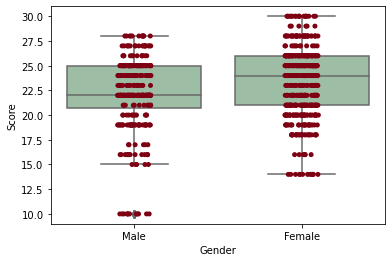

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Gender', y='Score', data=df_long1, color='#99c2a2')
ax = sns.stripplot(x="Gender", y="Score", data=df_long1, color='#7d0013')
plt.show()

## Method-1 Using t-test
Hypothesis are:

$H_0$: There is no difference in the mean score over gender

$H_1$: There is significant difference in the mean score over gender

In [ ]:
summary, results = rp.ttest(group1= df_long1['Score'][df_long1['Gender'] == 'Male'], group1_name= "Male",
                            group2= df_long1['Score'][df_long1['Gender'] == 'Female'], group2_name= "Female")
print(summary)

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0      Male  336.0  22.125000  3.757083  0.204966  21.721818  22.528182
1    Female  492.0  23.304878  3.459474  0.155965  22.998437  23.611319
2  combined  828.0  22.826087  3.627611  0.126068  22.578636  23.073538


In [ ]:
print(results)

              Independent t-test   results
0  Difference (Male - Female) =    -1.1799
1          Degrees of freedom =   826.0000
2                           t =    -4.6527
3       Two side test p value =     0.0000
4      Difference < 0 p value =     0.0000
5      Difference > 0 p value =     1.0000
6                   Cohen's d =    -0.3293
7                   Hedge's g =    -0.3290
8              Glass's delta1 =    -0.3140
9            Point-Biserial r =    -0.1598


## ONE-WAY ANOVA USING `scipy.stat`

Conducting an one-way ANOVA using `scipy.stats` is quick and only returns the restuling F-statistic and p-value of the test.

In [ ]:
stats.f_oneway(df_long1['Score'][df_long1['Gender'] == 'Male'],
               df_long1['Score'][df_long1['Gender'] == 'Female'])

F_onewayResult(statistic=21.647956737502646, pvalue=3.8137791093441738e-06)

>**Interpretation:** Since p-value is less than 0.05, the null hypothesis that there is no significant difference in the fruit rating score over gender.

## Using `statsmodels` library

This method conducts a one-way ANOVA in two steps:

- Fit the model using an estimation method,
The default estimation method in most statistical software packages is ordinary least squares.
- Pass fitted model into ANOVA method to produce ANOVA table

In [ ]:
from statsmodels.formula.api import ols

model = ols('Score ~ C(Gender)', data=df_long1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Gender),277.938229,1.0,21.647957,0.000004
Residual,10605.018293,826.0,NaN,NaN


This table provides all the information one needs in order to interprete if the results are significant; however, it does not provide any effect size measures to tell if the statistical significance is meaningful. The function below calculates eta-squared ($\eta^2$) and omega-squared ($\omega^2$). A quick note, $\eta^2$  is the exact same thing as $R^2$ except when coming from the ANOVA framework people call it $eta^2$; $\omega^2$ is considered a better measure of effect size since it is unbiased in it's calculation by accounting for the degrees of freedom in the model.


In [ ]:
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Gender),277.938229,1.0,277.938229,21.647957,0.000004,0.025539,0.02433
Residual,10605.018293,826.0,12.839005,NaN,NaN,NaN,NaN


>**Interpretation:** There is a statistically significant difference between the groups and their effects the libido, F= 21.64, p-value= 0.0, with an overall small effect, $\omega^2$ = 0.024.

In order to tell which groups differed significantly, post-hoc tests need to be conducted. Before one goes through that work, the assumptions should be checked first in case any modifications need to be made to the model.

In [ ]:
## normality of residuals
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9580403566360474, pvalue=1.201532583416107e-14)

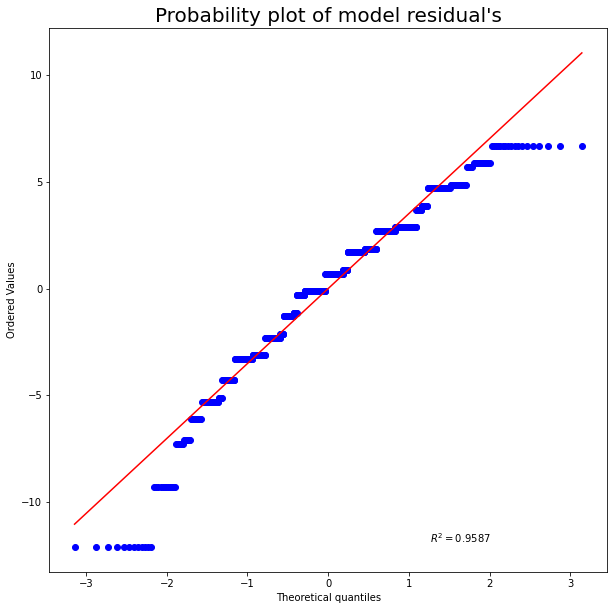

In [ ]:
## visualization

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

>**Conclusion**

Even though the ANOVA test subtstantiate the reasoning that the gender wise difference in the fruit rating score is statistically significant, the sufficiant conditions are not satisfied. So a non-parametric ANOVA is strongly recommended. But the $\chi^2$ test established the same result with  sufficiency condition checks.